# Space Server 

The Sloan Digital Sky Survey offers public data of space observations. The data is super insightful as per the creator. He says "I want to share the data."

Content
The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

Feature Description

The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.

We can read the feature descriptions below:

View "PhotoObj"
objid = Object Identifier
ra = J2000 Right Ascension (r-band)
dec = J2000 Declination (r-band)
Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.

Source: https://en.wikipedia.org/wiki/Right_ascension

u = better of DeV/Exp magnitude fit
g = better of DeV/Exp magnitude fit
r = better of DeV/Exp magnitude fit
i = better of DeV/Exp magnitude fit
z = better of DeV/Exp magnitude fit
The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

Further education: https://www.astro.umd.edu/~ssm/ASTR620/mags.html

run = Run Number
rereun = Rerun Number
camcol = Camera column
field = Field number
Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:

run number, which identifies the specific scan,
the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
An additional number, rerun, specifies how the image was processed.
View "SpecObj"
specobjid = Object Identifier
class = object class (galaxy, star or quasar object)
The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

redshift = Final Redshift
plate = plate number
mjd = MJD of observation
fiberid = fiber ID
In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.

Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.

Inspiration
The dataset offers plenty of information about space to explore. Also the class column is the perfect target for classification practices!



In [35]:
# Importing necesssary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [36]:
#Loading Dataset
df=pd.read_csv("Skyserver.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [37]:
# Let's have a look at the dataset info
df.info()

#dtypes: float64(10), int64(7), object(1)
#Rows: 1000, Columns: 18

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [38]:
# Describing the dataset
df.describe(include='all')

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GALAXY,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4998,NaN,NaN,NaN,NaN
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,NaN,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,NaN,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,NaN,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,NaN,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,NaN,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,NaN,0.092579,2559.000000,54468.000000,510.000000


objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

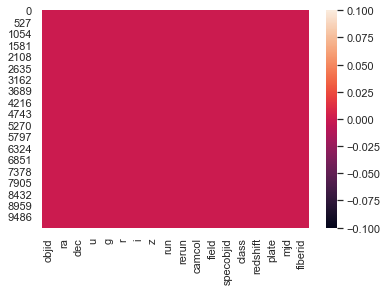

In [39]:
# Let's check the null values
sns.heatmap(df.isnull())
# No Null Values
df.isnull().sum()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

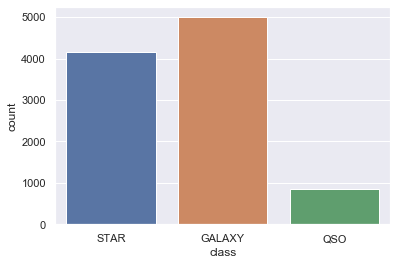

In [40]:
# Let's describe the label - 'Class'

sns.countplot(df['class'])
df['class'].value_counts()

Most of the dataset belongs to Galaxy and Star Class. There are 850 QSO's out of 10,000 rows

In [41]:
# Let's drop the ids objid and specobjid. Also, the features 'run', 'rerun', 'camcol' and 'field' are not related to CLass.
df.drop(columns=['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid'], axis=1, inplace=True)
df.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590,3306,54922,512


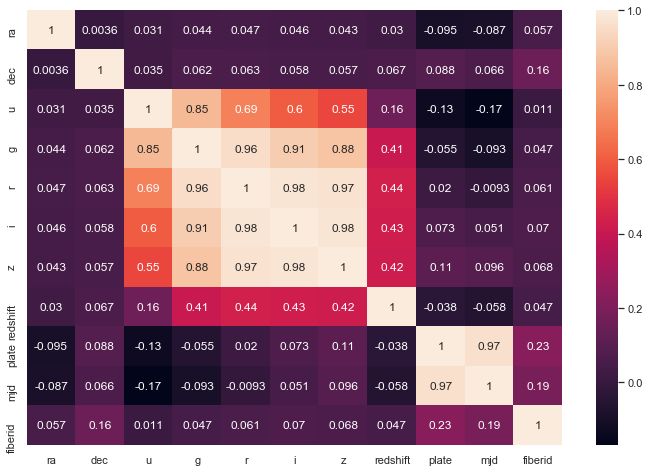

In [42]:
# Let's see the correlations
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

[u,g,r,i] show good amt. of correlation.
Also, plate and mjd have very high correlation

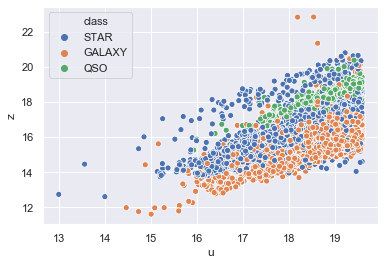

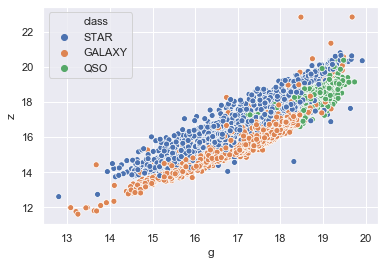

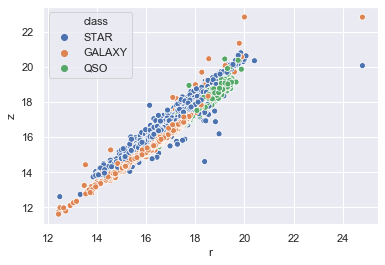

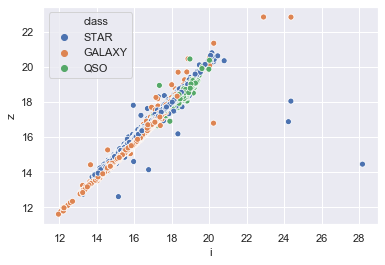

In [43]:
# Let's visualize 'u','g','r','i' features with respect to 'z'
l=['u','g','r','i']
for i in l:
    sns.set()
    sns.scatterplot(data=df,x=i,y='z',hue='class')
    plt.show()

Plotting redshift Vs Galaxy



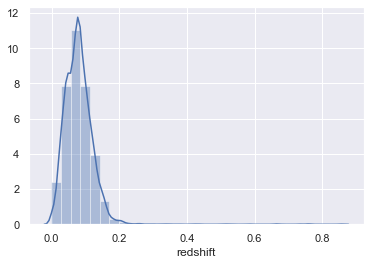

Plotting redshift Vs Stars



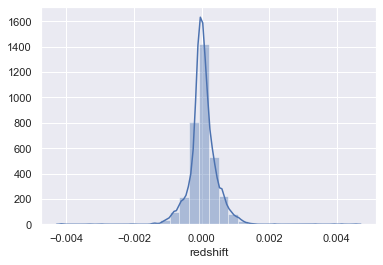

Plotting redshift Vs QSO



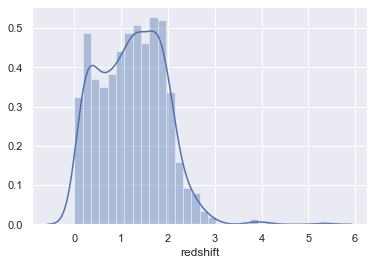

Plotting redshift



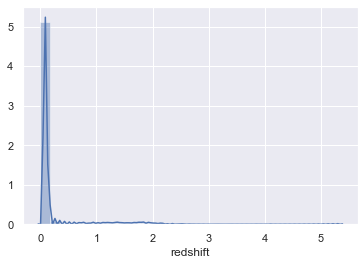

In [44]:
# Let's  see the distplots of redshift vs different classes
print("Plotting redshift Vs Galaxy\n")
sns.distplot(df[df['class']=='GALAXY']['redshift'], bins = 30)
plt.show()

print("Plotting redshift Vs Stars\n")
sns.distplot(df[df['class']=='STAR']['redshift'], bins = 30)
plt.show()

print("Plotting redshift Vs QSO\n")
sns.distplot(df[df['class']=='QSO']['redshift'], bins = 30)
plt.show()

print("Plotting redshift\n")
sns.distplot(df['redshift'], bins = 30)
plt.show()

# Stars and Galaxy show near-normal distribution, while QSO isn't

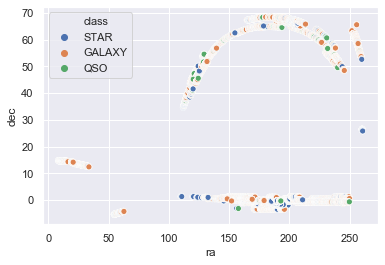

In [45]:
# Let's plot the right ascension and declination hued by class
sns.scatterplot(x='ra', y='dec', data=df, hue='class')

# Unable to distinguish various class base on ra, dec

In [46]:
# Let's now Label Encode class for further analysis
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class']=le.fit_transform(df['class'])
df.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,2,0.000590,3306,54922,512


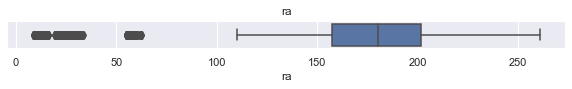

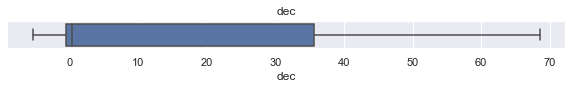

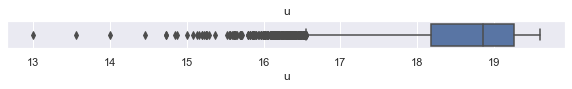

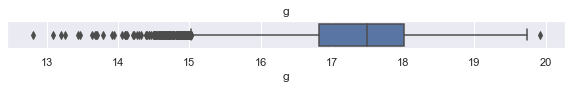

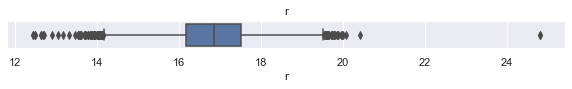

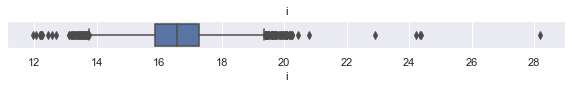

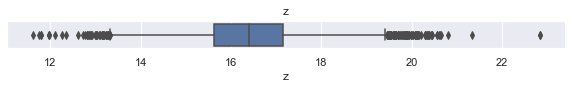

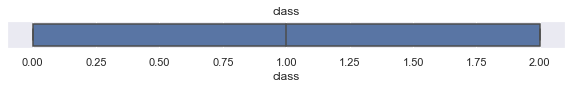

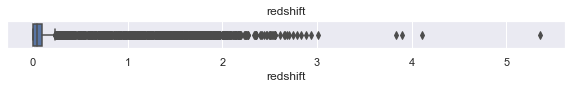

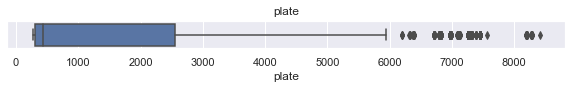

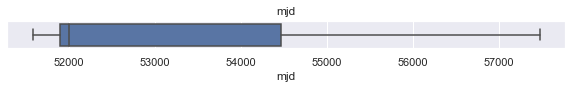

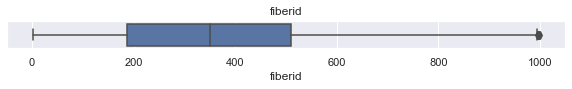

In [47]:
# There seem to be a few outliers. Let's plot and see
for i in df.columns:
    plt.figure(figsize=(10,0.5))
    plt.title(i)
    sns.boxplot(df[i])
    plt.show()

In [48]:
# Treating for outliers
from scipy.stats import zscore
z = abs(zscore(df))
print(df.shape)
df=df[(z<3).all(axis=1)]
print(df.shape)

# A lot of rows removed

(10000, 12)
(8698, 12)


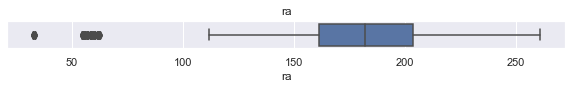

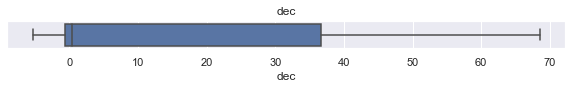

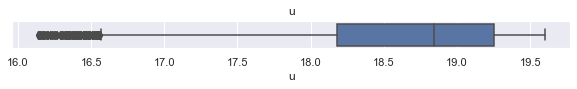

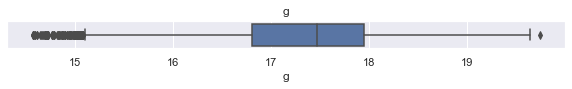

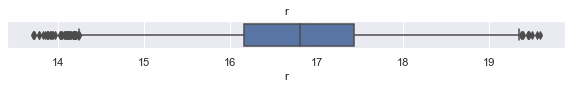

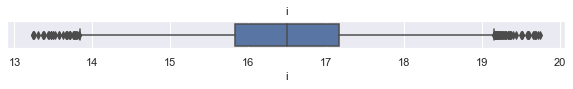

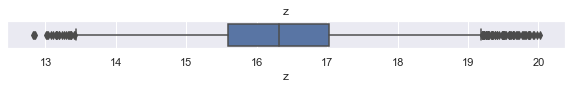

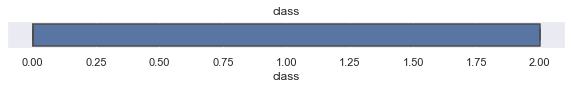

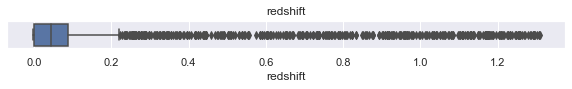

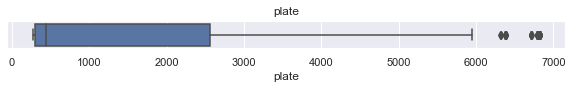

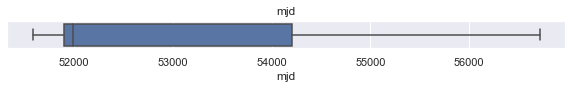

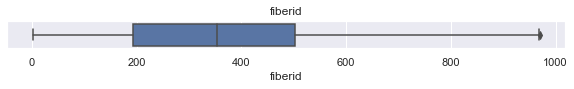

In [49]:
# Let's plot and see again
for i in df.columns:
    plt.figure(figsize=(10,0.5))
    plt.title(i)
    sns.boxplot(df[i])
    plt.show()

In [50]:
# Checking for skewness
df.skew()
# We need to treat

ra         -0.130951
dec         1.212911
u          -0.981103
g          -0.528033
r          -0.153454
i           0.055966
z           0.167256
class       0.292107
redshift    4.951700
plate       1.320088
mjd         0.963989
fiberid     0.065374
dtype: float64

In [51]:
# Treating for skewness
for col in df.columns:
    if df[col].dtypes!="object":
        if df.skew().loc[col]>0.55:
            df[col]=np.log1p(df[col])
        if df.skew().loc[col]<-0.55:
            df[col]=np.square(df[col])
df.skew()

ra         -0.130951
dec         0.255429
u          -0.898705
g          -0.528033
r          -0.153454
i           0.055966
z           0.167256
class       0.292107
redshift    4.195758
plate       0.752026
mjd         0.949578
fiberid     0.065374
dtype: float64

In [52]:
df.isnull().sum()

ra             0
dec         1069
u              0
g              0
r              0
i              0
z              0
class          0
redshift       0
plate          0
mjd            0
fiberid        0
dtype: int64

In [53]:
df['dec'] = df.groupby('class')['dec'].transform(lambda x: x.fillna(x.mean()))

In [54]:
# There still seems a lot of skewness. Let's apply again
# Treating for skewness
for col in df.columns:
    if df[col].dtypes!="object":
        if df.skew().loc[col]>0.55:
            df[col]=np.log1p(df[col])
        if df.skew().loc[col]<-0.55:
            df[col]=np.square(df[col])
df.skew()

# Skewness removed to a large extent

ra         -0.130951
dec         0.268957
u          -0.743933
g          -0.528033
r          -0.153454
i           0.055966
z           0.167256
class       0.292107
redshift    3.583415
plate       0.705819
mjd         0.948393
fiberid     0.065374
dtype: float64

In [55]:
df.isnull().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
plate       0
mjd         0
fiberid     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009E35E30E08>,
      dtype=object)

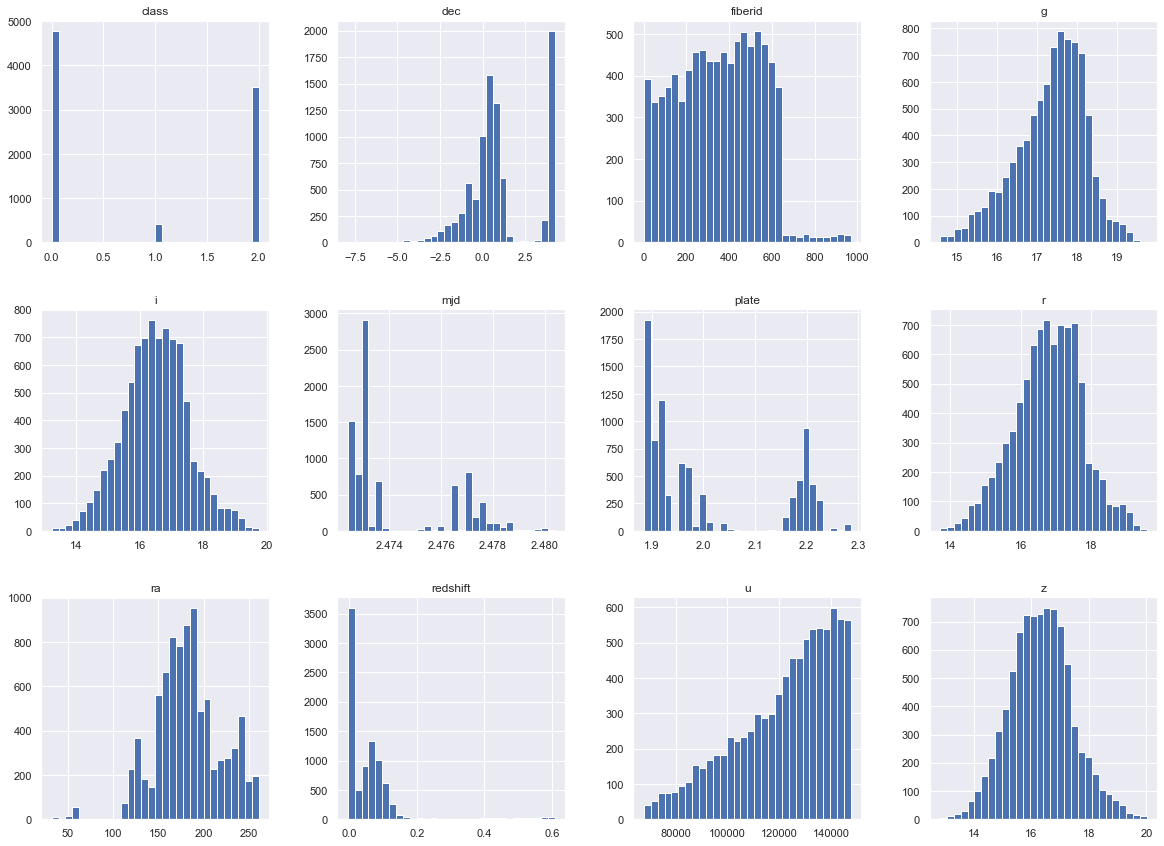

In [56]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)
# Now most of them seem to be Normally distributed

In [57]:
# Let's Separate our dataset into Features and target
df_x=df.drop(columns=["class"])
y=df[["class"]]

In [58]:
# Let's do Standard Scaling on the Continous variables (x)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,ra,dec,u,g,r,i,z,redshift,plate,mjd,fiberid
0,0.022563,-0.466700,1.152224,-0.332856,-0.855097,-0.969819,-1.007660,-0.632042,1.553862,1.664940,0.754994
1,0.024421,-0.446231,-0.022688,-0.134171,-0.098144,-0.009474,0.055512,-0.632533,-0.736656,-0.892123,1.016814
2,0.026689,-0.450250,1.012765,0.994046,0.729930,0.573183,0.429065,0.542570,-0.872895,-0.567184,0.870195
3,0.031964,-0.485272,-1.155596,-0.840484,-0.632831,-0.503275,-0.388577,-0.633129,1.553862,1.664940,0.854486
4,0.032318,-0.460839,-1.402877,-1.232219,-0.344809,0.054530,0.257682,-0.625637,1.553862,1.664940,0.864958


# Modelling

In [81]:
# For Multi-Class Classification let's focus on 'f1_macro' score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def f1(clf,df_x,y):
    max_f1_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        f1_scr=f1_score(y_test,y_pred,average='micro')
        if f1_scr>max_f1_score:
            max_f1_score=f1_scr
            final_r_state=r_state
    print("max f1 score corresponding to ",final_r_state," is ",max_f1_score)
    return final_r_state

In [76]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring='f1_macro')
    print("Mean f1 score for classifier: ",c_scores.mean())
    print("standard deviation in f1 score for classifier: ",c_scores.std())
    print(c_scores)

In [61]:
# PCA is required for the analysis to reduce curse of Dimensionality among ['g','r','i','z'] as they have high correlation
# PCA is required for the analysis to reduce curse of Dimensionality
from sklearn.decomposition import PCA
for i in range(5,12):
    pca = PCA(n_components=i)
    x_pca=pca.fit_transform(x)
    print(i," variance :{}".format(np.sum(pca.explained_variance_ratio_)))

5  variance :0.8882368729736191
6  variance :0.951042581993437
7  variance :0.9950742216660368
8  variance :0.9976621367546779
9  variance :0.999430029244273
10  variance :0.9997818608177216
11  variance :1.0000000000000002


In [62]:
# We find that after 9 the variance is almost the same so the remaining are redundant. Lets use n_components=9
pca = PCA(n_components=9)
x=pca.fit_transform(x)

In [63]:
x.shape

(8698, 9)

In [65]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
parameters = {"n_estimators":[10,50,100,150,200,250,500]}
clf = GridSearchCV(rfc, parameters, cv=5,scoring="f1_macro")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 150}

In [82]:
rfc=RandomForestClassifier(n_estimators=150)
r_state=f1(rfc,x,y)

max f1 score corresponding to  51  is  0.9683908045977011


In [83]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = {"n_neighbors":range(2,20)}
clf = GridSearchCV(knn, parameters, cv=5,scoring="f1_macro")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 3}

In [84]:
knn=KNeighborsClassifier(n_neighbors=3)
r_state=f1(knn,x,y)

max f1 score corresponding to  73  is  0.9563218390804598


In [85]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
parameters = {"criterion":["gini", "entropy"]}
clf = GridSearchCV(dc, parameters, cv=5,scoring="f1_macro")
clf.fit(x, y)
clf.best_params_

{'criterion': 'entropy'}

In [86]:
dc=DecisionTreeClassifier(criterion="entropy")
r_state=f1(dc,x,y)

max f1 score corresponding to  71  is  0.946551724137931


In [87]:
# SVM
from sklearn.svm import SVC
svc=SVC(probability=True)
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="f1_macro")
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [88]:
svc=SVC(kernel="linear",C=10,probability=True)
r_state=f1(svc,x,y)

max f1 score corresponding to  60  is  0.9948275862068966


In [89]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
r_state=f1(lg,x,y)

max f1 score corresponding to  94  is  0.9908045977011494


In [90]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
r_state=f1(gnb,x,y)

max f1 score corresponding to  85  is  0.9149425287356323


In [91]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
r_state=f1(gb,x,y)

max f1 score corresponding to  64  is  0.9683908045977011


In [93]:
# Cross Validation

print("\n\nRandom Forest Classifier\n\n")
model_evaluation(rfc,x,y)

print("\n\nKNN Classifier\n\n")
model_evaluation(knn,x,y)

print("\n\nSVM Classifier\n\n")
model_evaluation(svc,x,y)

print("\n\nDecisionTree Classifier\n\n")
model_evaluation(dc,x,y)

print("\n\nLogistic Regression Classifier\n\n")
model_evaluation(lg,x,y)

print("\n\nGaussian NB Classifier\n\n")
model_evaluation(gnb,x,y)

print("\n\nGradient Boost\n\n")
model_evaluation(gb,x,y)




Random Forest Classifier


Mean f1 score for classifier:  0.9507765954471296
standard deviation in f1 score for classifier:  0.008445591954671377
[0.95280029 0.95529551 0.95452761 0.9341173  0.95714227]


KNN Classifier


Mean f1 score for classifier:  0.9249338454027296
standard deviation in f1 score for classifier:  0.009230892296399772
[0.92745015 0.93511838 0.92932346 0.90770876 0.92506847]


SVM Classifier


Mean f1 score for classifier:  0.9768236019712463
standard deviation in f1 score for classifier:  0.00551076769756125
[0.97803047 0.97796549 0.98413925 0.96704856 0.97693423]


DecisionTree Classifier


Mean f1 score for classifier:  0.9032593631601911
standard deviation in f1 score for classifier:  0.009832983117300888
[0.92094475 0.89205587 0.89777727 0.90005823 0.90546069]


Logistic Regression Classifier


Mean f1 score for classifier:  0.966625479216685
standard deviation in f1 score for classifier:  0.007954559389536136
[0.96867166 0.96955576 0.97568433 0.95176423 0.96

# SVM Classifier with Mean f1 score  0.97 and Std Dev 0.007

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 60,test_size=0.20)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

In [97]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred,average='macro'))
print(y_pred)

Confusion matrix 
 [[949  13   9]
 [  8  86   0]
 [  0   0 675]]
classification report 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       971
           1       0.87      0.91      0.89        94
           2       0.99      1.00      0.99       675

    accuracy                           0.98      1740
   macro avg       0.95      0.96      0.96      1740
weighted avg       0.98      0.98      0.98      1740

F1 Score: 0.9563363424377215
[0 2 0 ... 2 2 2]


In [98]:
from sklearn.externals import joblib
joblib.dump(svc,'Space_Server.pkl')

['Space_Server.pkl']